# HW 5 Assignment 2
Nurvirta Monarizqa (nm2773)

In [1]:
import pandas as pd
import sys
import numpy 
import pylab as pl

import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read Files

In [2]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
keys = ['all', 'white', 'black', 'asian', 'hispanic']
data_m = ['pinc08_2_1_1.xls', 'pinc08_2_1_4.xls', 'pinc08_2_1_6.xls', 'pinc08_2_1_8.xls', 'pinc08_2_1_9.xls']
data_f = ['pinc08_3_1_1.xls', 'pinc08_3_1_4.xls', 'pinc08_3_1_6.xls', 'pinc08_3_1_8.xls', 'pinc08_3_1_9.xls']

all_males ={}
all_females ={}


def income(key, data, dict_name):
    for i in range(len(keys)): 
        dict_name[key[i]] = pd.read_excel(url + data[i], header = 9)

income(keys, data_m, all_males)
income(keys, data_f, all_females)

In [3]:
all_females['all'].head(3)

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032


In [4]:
print(type(all_males))
print(type(all_females))

<type 'dict'>
<type 'dict'>


In [5]:
all_females['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

## Exploratory Phase

In [7]:
print (all_males['asian'].shape)
all_males['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [8]:
for gender in [all_males, all_females]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #if some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

C:\Users\Nurvirta\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Plot the Data

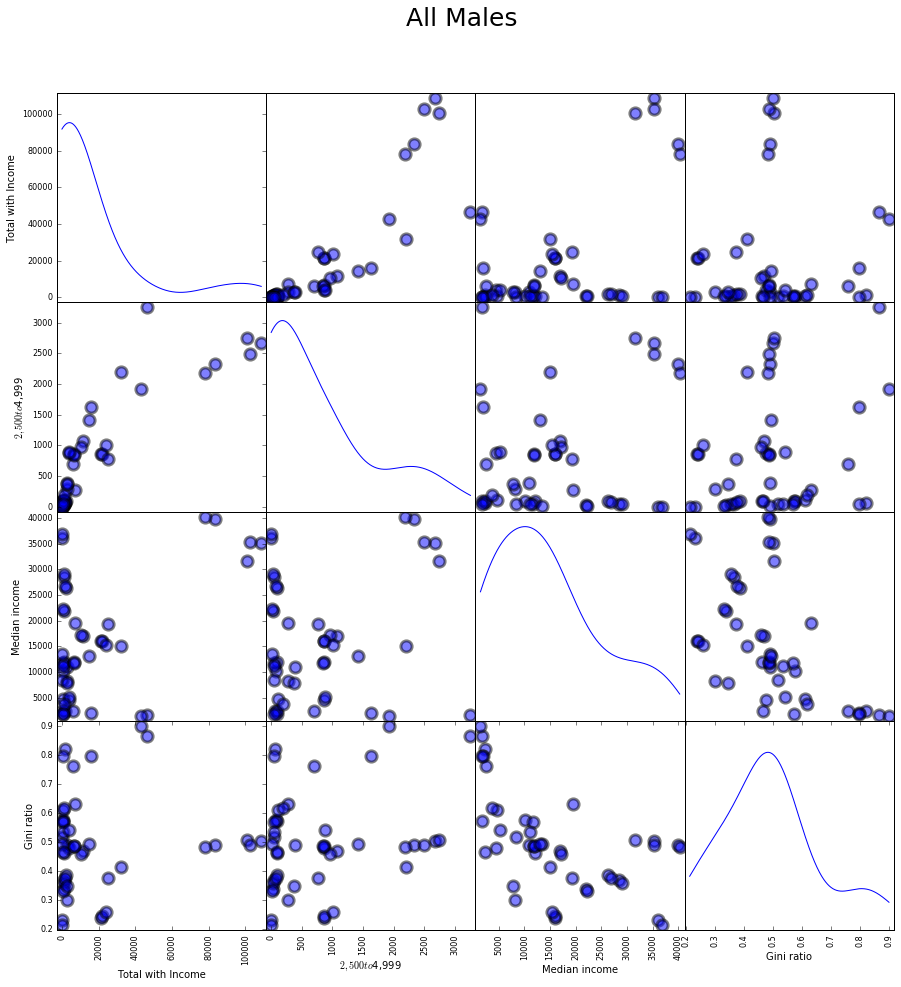

In [9]:
def plot_scatter(df, title):
    fig = pd.scatter_matrix(df['all']
                   [['Total with Income','$2,500 to $4,999','Median income','Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), diagonal='kde')
    pl.suptitle(title, fontsize = 25)
    
plot_scatter(all_males, 'All Males')

Figure 1: Scatter plot of All Males income data

The diagonal indicate the kernel density estimation of each selected column (Total with Income, $2500 to $4999, Median income and Gini ratio) for **male** only. The distribution looks right-skewed, and the gini ratio kde (lower right) is having peak somewhere around 0.5, means the median is around that place. The other plots are the scatter plots between a column in X axis and another in Y axis.

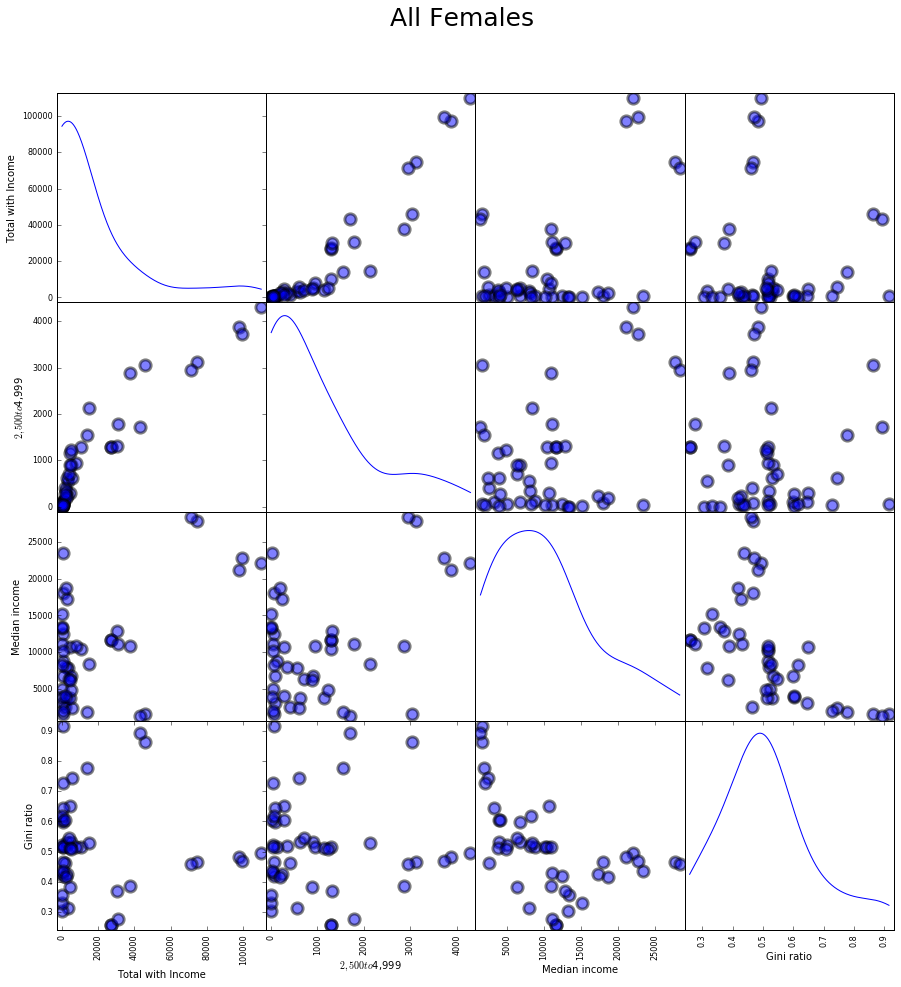

In [10]:
plot_scatter(all_females, 'All Females')

Figure 1: Scatter plot of All Females income data

The diagonal indicate the kernel density estimation of each selected column (Total with Income, $2500 to $4999, Median income and Gini ratio)for **female** only. Similar with male data, the other plots are the scatter plots between a column in X axis and another in Y axis. Also, similarities can be found in the diagonal plots as well, where the distributions are right-skewed, meaning it is concentrated to the lower values. The gini ratio kde has median of 0.5 as well but it is higher in shape, meaning more females having gini ratio of 0.5.

## Regression 1: Plot data and a line with gradient 1

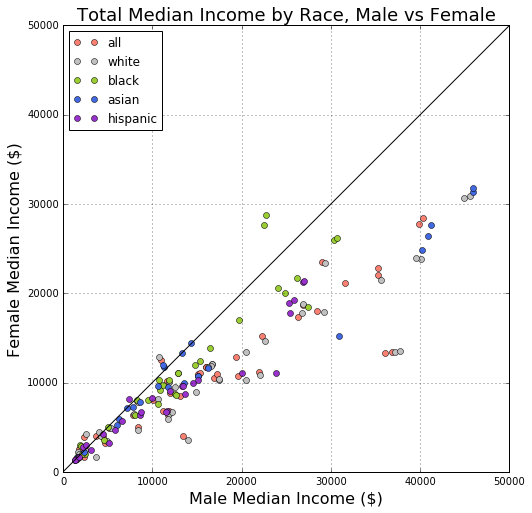

In [11]:
def create_income_plot(colors):
    keys = ['all', 'white', 'black', 'asian', 'hispanic']
    pl.figure(figsize = (8, 8))
    for i in range(len(keys)):
        x = all_males[keys[i]]['Median income']
        y = all_females[keys[i]]['Median income']
        pl.plot(x,y, 'bo',color = colors[i], label = keys[i])
    pl.axis([0,50000,0,50000])
    pl.plot([0,50000],[0,50000],'k')
    pl.title('Total Median Income by Race, Male vs Female', fontsize = 18)
    pl.xlabel('Male Median Income ($)',fontsize = 16)
    pl.ylabel('Female Median Income ($)', fontsize = 16)
    pl.grid()
colors = ['salmon', 'silver', 'yellowgreen', 'royalblue', 'darkorchid']
create_income_plot(colors)
pl.legend(loc = 'upper left')

Figure 3: Male median income vs female median income

As we can see, there are more dots under the `x=y` line, meaning there is an inequality between male and female income. Males have more income than females.

## Regression 2: Regression with only 1 data point for each category

In [12]:
def create_male_female_df(data_point):
    female = pd.Series([0])
    male = pd.Series([0])
    category = ['0']
    for i in keys:
        fseries = pd.Series(all_females[i]['Median income'][data_point])
        mseries = pd.Series(all_males[i]['Median income'][data_point])
        female = female.append(fseries)
        male = male.append(mseries)
        category = category + [i]*len(mseries)
    allgender = pd.DataFrame({"Female" : female,
                             "Male": male,
                             "Category":category})
    allgender.index = range(len(allgender))
    return allgender, female, male
allgender_data1, female1, male1 = create_male_female_df(1)
allgender_data1

,Category,Female,Male
0,0,0.0,0.0
1,all,22063.0,35228.0
2,white,23780.0,40122.0
3,black,20044.0,24855.0
4,asian,24840.0,40153.0
5,hispanic,17762.0,25411.0


In [13]:
# plot
def plot_single_data(df):
    for i in range(1,6):
        pl.plot(df.Male[i],df.Female[i],'o',ms=15,c = colors[i-1], label = 'selected ' + keys[i-1])
    pl.legend(loc ='upper left')

### Using OLS from statsmodels

In [14]:
#ols
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Female ~ Male', data = allgender_data1).fit()
print(lm.params)
print(lm.rsquared)

Intercept    1674.692688
Male            0.593844
dtype: float64
0.951678545321


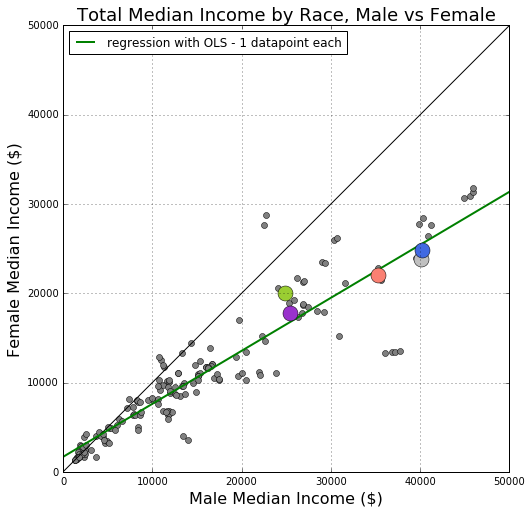

In [15]:
X = np.arange(50000)

create_income_plot(colors=['gray']*5)
ols, = pl.plot(X,X*lm.params[1] +lm.params[0], 'g-', linewidth = 2)
plot_single_data(allgender_data1)
pl.legend([ols],['regression with OLS - 1 datapoint each'], 
        loc = 'upper left')

Figure 4: Regression with 1 datapoint for each category with OLS method from statsmodels package.

The big orange, gray, green, blue, and purple dots are representing 1 datapoint from all, white, black, asian, and hispanic respectively. The green line is a regression line produced by the samples.

It returns the coefficient of 0.593844 for males and 1674.692688 intercept. It means according to this calculation, a female could only gains 0.593844 portion of male's income. 

### Analytical Best Regression

In [16]:
import scipy.stats as stats
cor = stats.spearmanr(male1, female1)
beta1 = cor[0] * female1.std() / male1.std()
beta0 = female1.mean() - beta1 * male1.mean()
beta0, beta1

(2224.3609760454747, 0.57394829035421069)

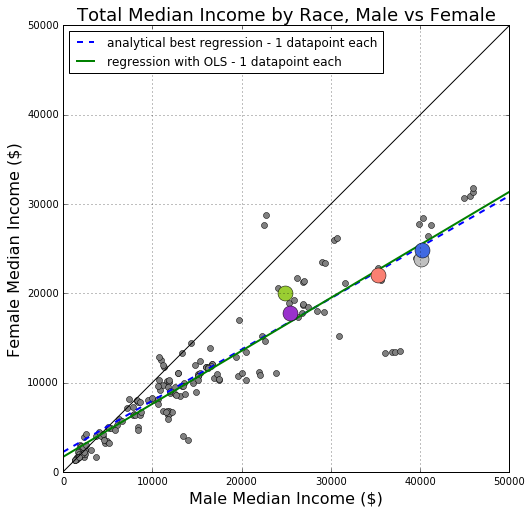

In [17]:
an_predict = beta1*X+ beta0
create_income_plot(colors=['gray']*5)
ab, = pl.plot(X,an_predict, 'b--', linewidth = 2)
ols, = pl.plot(X,lm.params[1]*X+lm.params[0], 'g-', lw = 2)
plot_single_data(allgender_data1)
pl.legend([ab, ols],['analytical best regression - 1 datapoint each','regression with OLS - 1 datapoint each'], 
        loc = 'upper left')

Figure 5: Regression with 1 datapoint for each category with analytical method.

The big orange, gray, green, blue, and purple dots are representing 1 datapoint from all, white, black, asian, and hispanic respectively. The dashed blue line is a regression line produced by the samples.

It returns the coefficient of 0.57394 for males and 2224.360976 intercept. It means according to this calculation, a female could only gains 0.573844 portion of male's income. 

## Regression 3: Using all datapoints

In [18]:
allgender, female, male = create_male_female_df(np.arange(50))
allgender = allgender.dropna()
allgender.head(10)

,Category,Female,Male
0,0,0.0,0.0
2,all,22063.0,35228.0
3,all,27736.0,39903.0
4,all,28402.0,40298.0
5,all,10732.0,19557.0
6,all,1635.0,2359.0
7,all,11686.0,15974.0
8,all,7950.0,8232.0
9,all,2569.0,1829.0
10,all,12501.0,11010.0


### Ols with statsmodels

In [19]:
lm1 = smf.ols(formula = 'Female ~ Male', data = allgender).fit()
print(lm1.params)
print(lm1.rsquared)

Intercept    1470.993894
Male            0.609942
dtype: float64
0.860609191064


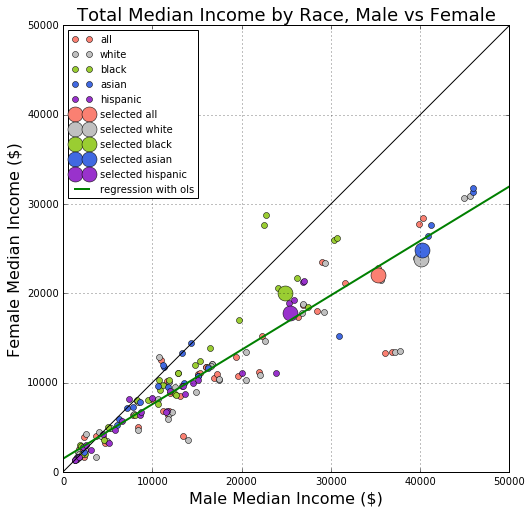

In [20]:
create_income_plot(colors)
plot_single_data(allgender_data1)
pl.plot(X,lm1.params[1]*X+lm1.params[0],'g', lw = 2, label = "regression with ols")
pl.legend(loc='upper left', fontsize = 10)

Figure 6: Regression with all datapoints and OLS statsmodels.

This model returns 0.609942 for male coefficient, higher than the previous 2 models.

### Analytical best regression line - Final Plot

In [21]:
cor = stats.spearmanr(male, female)
beta1 = cor[0] * female.std() / male.std()
beta0 = female.mean() - beta1 * male.mean()
beta0, beta1

(1887.755120411608, 0.57110585481919007)

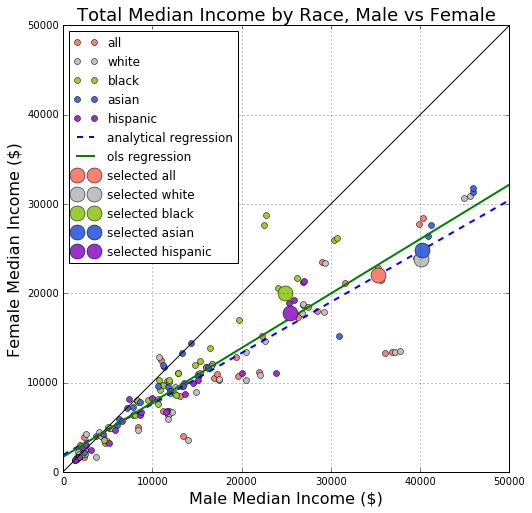

In [22]:
an_predict = beta1*X+ beta0
create_income_plot(colors)
ab, = pl.plot(X,an_predict, 'b--', linewidth = 2, label = 'analytical regression')
ols, = pl.plot(X,lm1.params[1]*X+lm.params[0], 'g-', lw = 2, label = 'ols regression')
plot_single_data(allgender_data1)
plt.legend(loc='upper left')

Figure 7: Regression with all datapoints and analytical method.

This model returns 0.5711 for male coefficient, quite similar with our second try with only 5 datapoints. It is also lower than the one produced by OLS in Figure 6 although it has larger intercept.

# Making Prediction
Suppose that I want a $80,000 salary job that my husband has. Since I am a female, what is my realistic salary expectation?

### 1. Using OLS

In [23]:
# Using OLS lm1 (regression with total median)
lm1.params

Intercept    1470.993894
Male            0.609942
dtype: float64

In [24]:
my_salary = lm1.params[1]*80000 + lm1.params[0]
print('My expected salary according to statsmodels OLS is $' + str(my_salary) )

My expected salary according to statsmodels OLS is $50266.3546849


### 2. Using analytical best regression

In [25]:
# print parameters
beta0, beta1

(1887.755120411608, 0.57110585481919007)

In [26]:
my_salary = beta1*80000 + beta0
print('My expected salary according to analytical method is $' + str(my_salary) )

My expected salary according to analytical method is $47576.2235059


# Comparison by Category

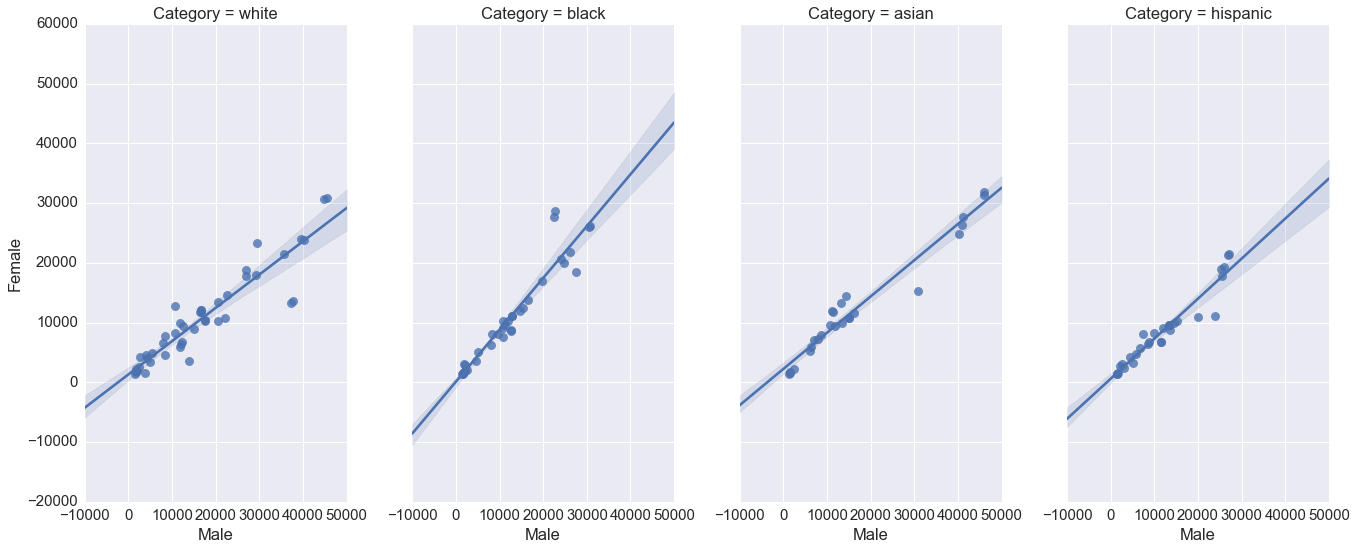

In [27]:
# using seaborn to make it easier
import seaborn as sns
byCat = allgender[(allgender.Category != 'all') & (allgender.Category != '0')].copy()
sns.set(font_scale = 1.5)
sns.lmplot(x='Male',y='Female',data=byCat, col='Category', aspect = 0.6,size =8,scatter_kws={'s':80})

Figure 8: Regression per category.

As we can see, different categories return different conditions. Black has higher slope than the others, followed by hispanic, asian, and white. It means black has the least income inequality based on gender.